In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

from scipy.stats import norm

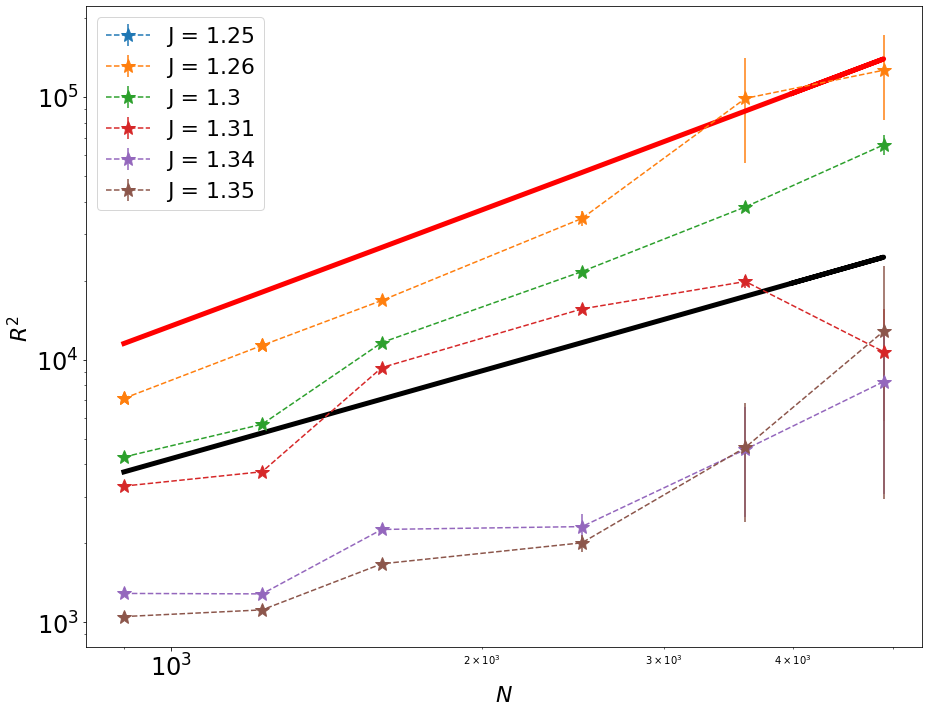

In [7]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))

data_np = data_np[data_np[:,0]>800] 

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

J_s = np.unique(data_np[:, 1])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7

y= np.argsort(data_np[:, 0],kind='mergesort')
data_np=data_np[y]

J_s = [1.25, 1.26, 1.30, 1.31, 1.34, 1.35] 

for l in J_s:
    #if (l<100):
        #continue
        
    #if (l==0.83): continue
    #if (l==0.86): continue    
        
    data_l = data_np[data_np[:,1]==l]
    J_l = data_l[:, 0]
    r_l = data_l[:, 3]
    
    bc = r_l 
 
    errs = data_l[:, 4] 
   
    plt.errorbar(J_l, bc, yerr=errs, fmt="*--", ms = 15, label = "J = " + str((l)))

    
lengths = np.unique(data_np[:, 0])
lengths=lengths[lengths>500]
lengths=np.append(lengths, values=[4000])
b =  0.191878586
 
y = np.power(lengths+1, 2*nu)*(1+b)+lengths
plt.plot(lengths, y, "-", c="k", lw=5)
 
    
    
b = -0.60715

nu=3/4
y = np.power(lengths+1, 2*nu)*(1+b)+lengths
plt.plot(lengths, y, "-",c="r", lw=5)
b =  0.10878586 
nu=1/2
y = np.power(lengths+1, 2*nu)*(1+b)+lengths
#plt.plot(lengths, y, c="b")
    
plt.xlabel(r'$N$', fontsize = 22)
plt.ylabel(r"$ R^2  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
    
plt.yscale('log')
plt.xscale('log')

plt.tight_layout()

plt.legend(fontsize=22)

plt.savefig("Thesis/Images/r2log.png", bbox_inches='tight')

In [2]:
columns = "N J h mean_R_sq err_mean_R_sq mean_R_gyr_sq err_mean_R_gyr_sq mean_e err_mean_e mean_e_sq err_mean_e_sq mean_e_fourth err_mean_e_fourth mean_sin err_mean_sin mean_cos err_mean_cos mean_m_sq err_mean_m_sq mean_m_fourth err_mean_m_fourth steps bulk2 err_bulk2 bulk3 err_bulk3 bulk4 err_bulk4 lambda1 err_lambda1 lambda2 err_lambda2 asperical err_aspherical"
columns = columns.split()

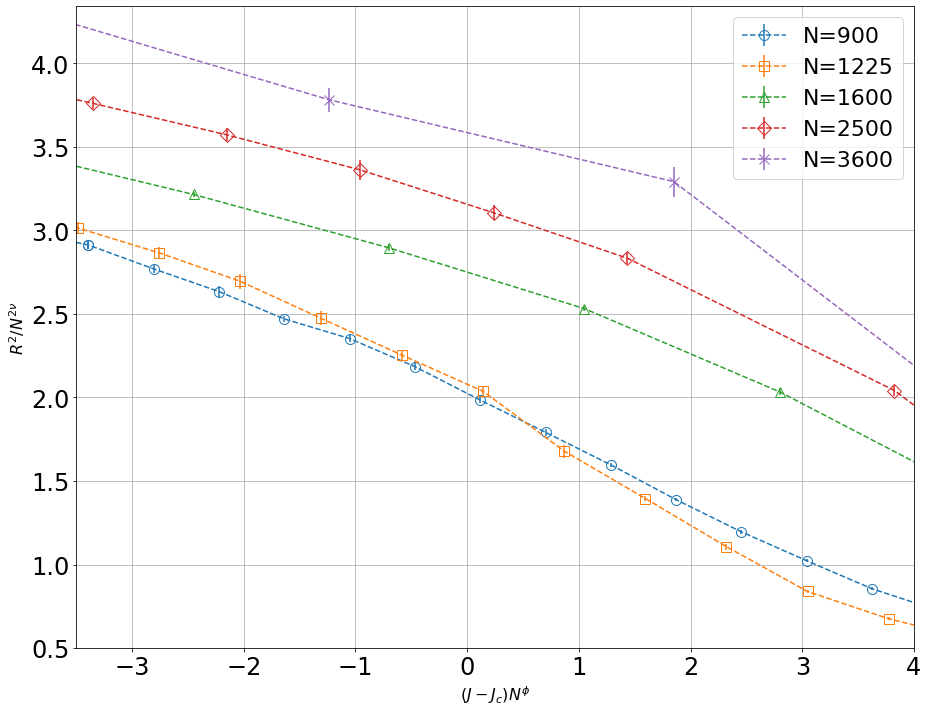

In [3]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))

data_np = data_np[data_np[:,0]>800] 


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

data_all = pd.DataFrame(data_np, columns=columns)
data_scale = data_all.copy()

nu = 4/7


data_scale["mean_R_sq"] = data_all["mean_R_sq"] / data_all["N"]**(2*nu)
data_scale["err_mean_R_sq"] = data_all["err_mean_R_sq"] / data_all["N"]**(2*nu)

Jc = 1.294
theta = 0.7

markers = ['o--', 's--', '^--', 'D--', "x--"]
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
for L, m in zip(np.unique(data_scale["N"]), markers):
    d = data_scale[data_scale["N"] == L]
    data_scale["mean_R_sq"] = data_all["mean_R_sq"] / data_all["N"]**(2*nu)
    plt.errorbar((d["J"] - Jc) * L**theta, d["mean_R_sq"], yerr=d["err_mean_R_sq"], label="N=%d"%L,
                fmt=m, ms=10, fillstyle='none',)

plt.xlabel(r'$(J - J_c) N^\phi$', fontsize=16)
plt.ylabel(r'$R^2 / N^{2\nu}$', fontsize=16)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim([-3.5, 4])
plt.ylim([0.5, 4.34])
plt.grid()
plt.legend(fontsize=22)
plt.tight_layout()
plt.savefig('Thesis/Images/R2_data_collapse_phi.png', bbox_inches='tight')

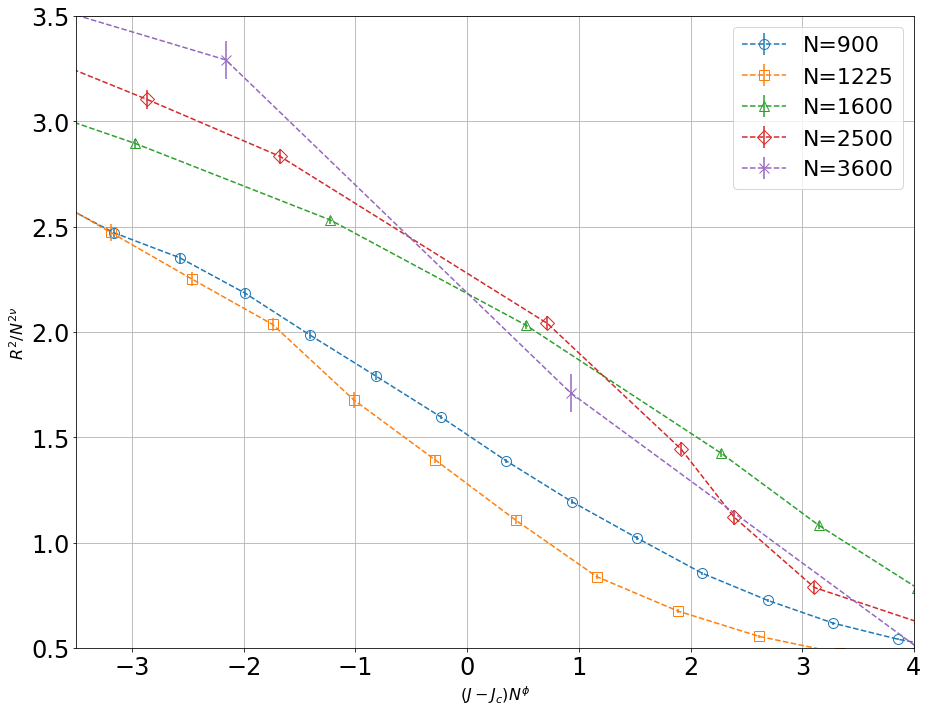

In [4]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))

data_np = data_np[data_np[:,0]>800] 


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

data_all = pd.DataFrame(data_np, columns=columns)
data_scale = data_all.copy()

nu = 4/7


data_scale["mean_R_sq"] = data_all["mean_R_sq"] / data_all["N"]**(2*nu)
data_scale["err_mean_R_sq"] = data_all["err_mean_R_sq"] / data_all["N"]**(2*nu)

Jc = 1.307
theta = 0.7

markers = ['o--', 's--', '^--', 'D--', "x--"]

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

for L, m in zip(np.unique(data_scale["N"]), markers):
    d = data_scale[data_scale["N"] == L]
    data_scale["mean_R_sq"] = data_all["mean_R_sq"] / data_all["N"]**(2*nu)
    plt.errorbar((d["J"] - Jc) * L**theta, d["mean_R_sq"], yerr=d["err_mean_R_sq"], label="N=%d"%L,
                fmt=m, ms=10, fillstyle='none',)

plt.xlabel(r'$(J - J_c) N^\phi$', fontsize=16)
plt.ylabel(r'$R^2 / N^{2\nu}$', fontsize=16)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim([-3.5, 4])
plt.ylim([0.5, 3.5])
plt.grid()
plt.legend(fontsize=22)
plt.tight_layout()
plt.savefig('Thesis/Images/R2_data_collapse_phi1.png', bbox_inches='tight')

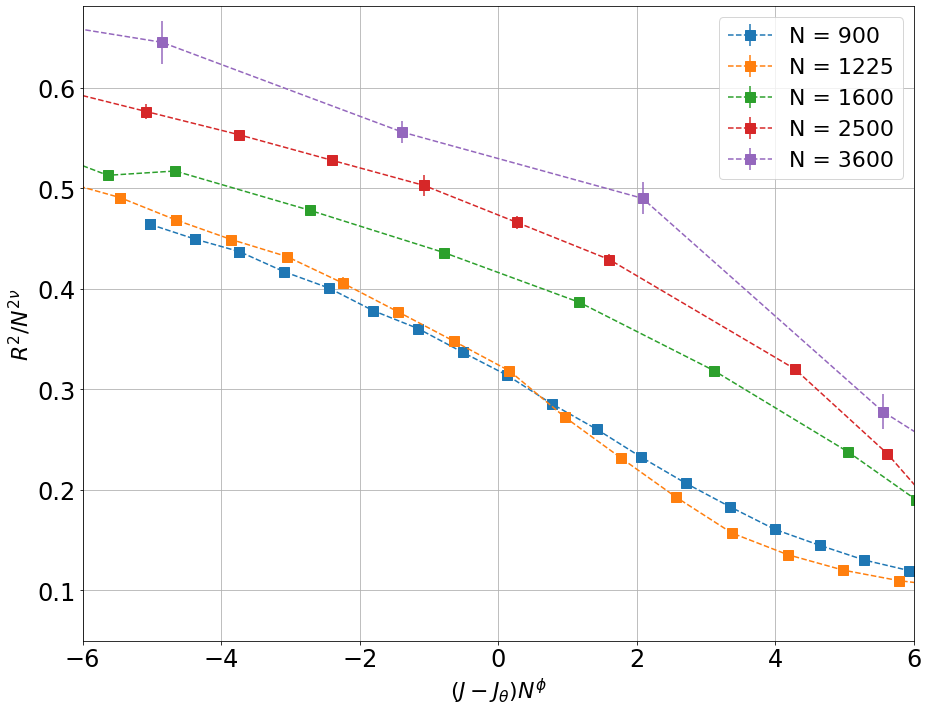

In [5]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))

data_np = data_np[data_np[:,0]>800] 


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7
phi = 5.0/7
J_theta = Jc = 1.294
for l in lengths:
    
    if (l>4000):
        continue
 
    data_l = data_np[data_np[:,0]==l]
    J_l = (data_l[:, 1]-J_theta)* (l**phi)
    r_l = data_l[:, 5]
    
    bc = r_l/np.power(l, 2*nu)
  
    errs = data_l[:, 6]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
 
 
plt.xlabel(r'$ (J-J_{\theta})  N ^{\phi} $', fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 

plt.ylim(0.05, 0.681)
plt.xlim(-6, 6)
#ax.set_xlim([-4.9, 5.9])
plt.legend(fontsize=22)
plt.tight_layout()
plt.grid()

plt.savefig("Thesis/Images/rscalinglong_dc.png", bbox_inches='tight')

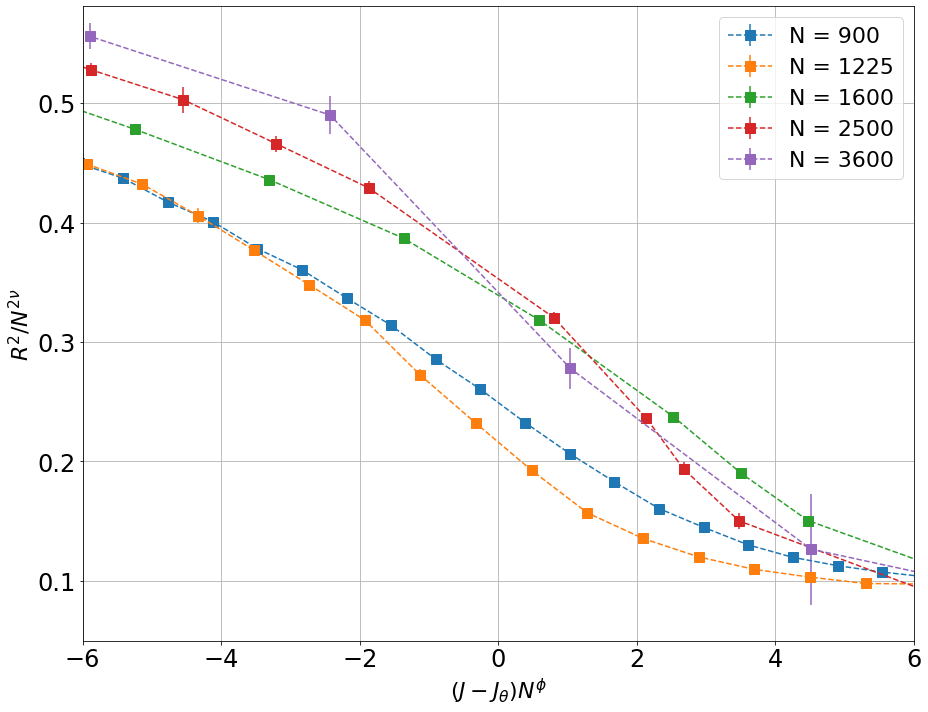

In [6]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))

data_np = data_np[data_np[:,0]>800] 


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7
phi = 5.0/7
J_theta = Jc = 1.307
for l in lengths:
    
    if (l>4000):
        continue
 
    data_l = data_np[data_np[:,0]==l]
    J_l = (data_l[:, 1]-J_theta)* (l**phi)
    r_l = data_l[:, 5]
    
    bc = r_l/np.power(l, 2*nu)
  
    errs = data_l[:, 6]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
 
 
plt.xlabel(r'$ (J-J_{\theta})  N ^{\phi} $', fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 

plt.ylim(0.05, 0.581)
plt.xlim(-6, 6)
#ax.set_xlim([-4.9, 5.9])
plt.legend(fontsize=22)
plt.tight_layout()
plt.grid()

plt.savefig("Thesis/Images/rscalinglong_dc1.png", bbox_inches='tight')

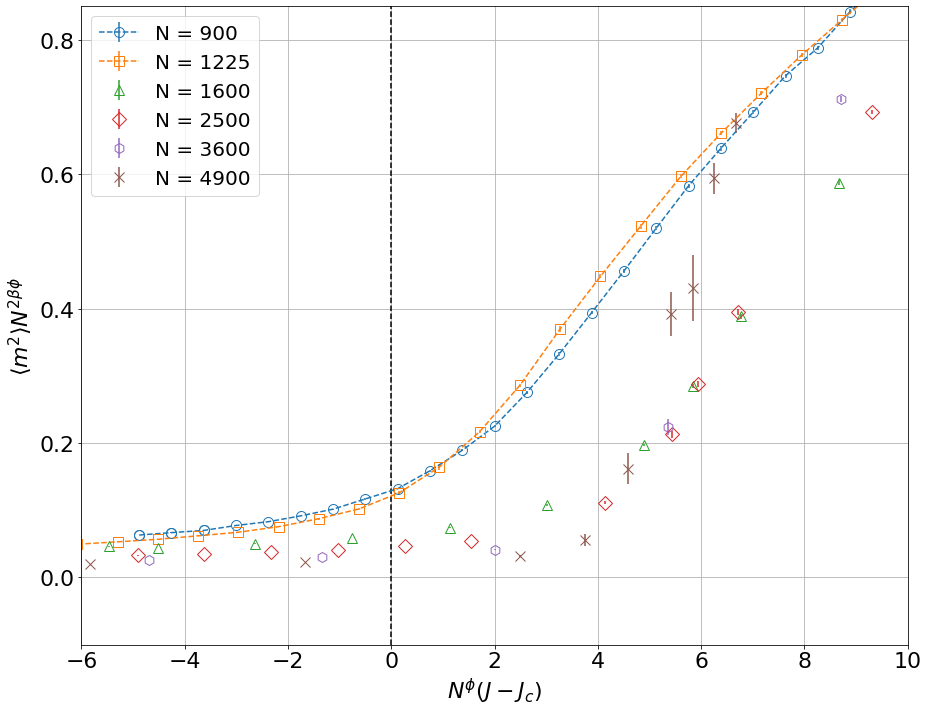

In [20]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))

data_np = data_np[data_np[:,0]>800] 
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 1.294
 
nu = 0.71
gamma = 2/8*nu
lengths = np.unique(data_np[:, 0])
markers = ['o--', 's--', '^', 'D', 'h', 'x']
i= 0 
for l in lengths:
    
    if (l<250):
        continue
        
    L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    m2 = data_l[:,17] 
    
    x = np.abs(J_l-Tc)
    
    x = (J_l-Tc)*np.power(L, nu)   
    y = m2*np.power(L, gamma) 
    errs = data_l[:,18]*np.power(L, gamma)
   
    plt.errorbar( x, y, yerr=errs, fmt=markers[i], ms=10, fillstyle='none', label = "N = " + str(int(l)))
    i+=1
 
    
plt.axvline(x=0, ls= 
            "--", c="k" )

plt.xlabel(r'$T$', fontsize = 22)
plt.ylabel(r"$ m^2  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.xlim(-6, 10)
plt.ylim(-0.1, 0.85)

#plt.xlabel(r'$ \sqrt{N} (J-J_{\theta}) $', fontsize = 22)
plt.xlabel(r'$ N ^{ \phi  } (J-J_{c}) $', fontsize = 22)
#plt.ylabel(r"$ C / N ^{\frac{1}{2} \alpha \phi}$ ", fontsize=22)
#plt.ylabel(r"$ \langle m^2 \rangle N ^{\frac{2 \beta }{\nu}  }$ ", fontsize=22)
plt.ylabel(r"$ \langle m^2 \rangle N ^{ 2\beta \phi  }$ ", fontsize=22)
#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
plt.grid()
plt.tight_layout()
plt.savefig('Thesis/Images/2dmag2scaling.png', bbox_inches='tight')

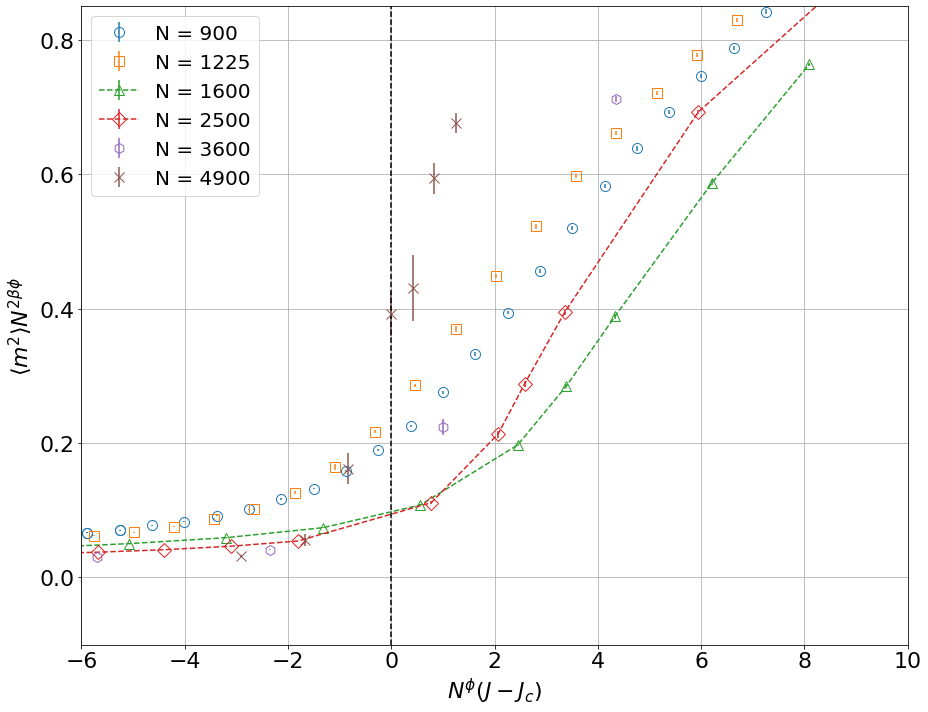

In [21]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))

data_np = data_np[data_np[:,0]>800] 
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 1.307
 
nu = 0.71
gamma = 2/8*nu
lengths = np.unique(data_np[:, 0])
markers = ['o', 's', '^--', 'D--', 'h', 'x']
i= 0 
for l in lengths:
    
    if (l<250):
        continue
        
    L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    m2 = data_l[:,17] 
    
    x = np.abs(J_l-Tc)
    
    x = (J_l-Tc)*np.power(L, nu)   
    y = m2*np.power(L, gamma) 
    errs = data_l[:,18]*np.power(L, gamma)
   
    plt.errorbar( x, y, yerr=errs, fmt=markers[i], ms=10, fillstyle='none', label = "N = " + str(int(l)))
    i+=1
 
    
plt.axvline(x=0, ls= 
            "--", c="k" )

plt.xlabel(r'$T$', fontsize = 22)
plt.ylabel(r"$ m^2  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.xlim(-6, 10)
plt.ylim(-0.1, 0.85)

#plt.xlabel(r'$ \sqrt{N} (J-J_{\theta}) $', fontsize = 22)
plt.xlabel(r'$ N ^{ \phi  } (J-J_{c}) $', fontsize = 22)
#plt.ylabel(r"$ C / N ^{\frac{1}{2} \alpha \phi}$ ", fontsize=22)
#plt.ylabel(r"$ \langle m^2 \rangle N ^{\frac{2 \beta }{\nu}  }$ ", fontsize=22)
plt.ylabel(r"$ \langle m^2 \rangle N ^{ 2\beta \phi  }$ ", fontsize=22)
#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
plt.grid()

plt.tight_layout()
plt.savefig('Thesis/Images/2dmag2scaling1.png', bbox_inches='tight')